## 进入mmdetection主目录

In [4]:
import os
path0 = '/home/liangyu/code/mmlab2/2023AI/0601/ear_test/MMPosehomework/content1/'
os.chdir(path0)
# import os
# os.chdir(path0 + 'mmdetection')

## 导入工具包

In [5]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [6]:
pwd

'/home/liangyu/code/mmlab2/2023AI/0601/ear_test/MMPosehomework/content1'

## 载入训练日志

In [48]:
# 日志文件路径
log_path = path0 + 'work_dir/rtmpose-s-ear/20230605_114317/vis_data/scalars.json'
log_path

'/home/liangyu/code/mmlab2/2023AI/0601/ear_test/MMPosehomework/content1/work_dir/rtmpose-s-ear/20230605_114317/vis_data/scalars.json'

In [49]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [50]:
len(json_list)

1830

In [51]:
eval(json_list[6])

{'lr': 0.0012631852631578948,
 'data_time': 6.082045146397182,
 'loss': 0.3610099735004561,
 'loss_kpt': 0.3610099735004561,
 'acc_pose': 0.19642857142857142,
 'time': 7.023748568126133,
 'epoch': 2,
 'step': 7}

In [52]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████| 1830/1830 [00:00<00:00, 2216.86it/s]


In [ ]:
# -eta:剩余训练时间
# -memory:内存使用
# -loss_rpn_cls：rpn层的分类损失（rpn层中对分类进行评估）
# -loss_rpn_bbox：rpn层的回归损失（rpn层中对bbox定位进行评估）
# -loss_cls：分类损失（对分类进行评估，采用真实分类概率决定）
# -loss_bbox：回归损失（对bbox定位进行评估，用于比较真实分类对应的预测参数 tutu 和真实平移缩放参数为 vv 的差别）它在训练过程中是4个损失里面最大的
# -loss:总损失（上面4个损失之和）
# -loss=loss_rpn_cls+loss_rpn_bbox+loss_cls+loss_bbox
# -acc:准确度

In [53]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,step
0,4.000000e-08,7.748629,0.421912,0.421912,0.007440,8.808028,1.0,1.0
1,2.105642e-04,7.087352,0.422175,0.422175,0.010417,8.151212,1.0,2.0
2,4.210884e-04,6.968610,0.421747,0.421747,0.008929,8.014630,1.0,3.0
3,6.316126e-04,6.913014,0.420343,0.420343,0.044643,7.874300,1.0,4.0
4,8.421368e-04,6.878065,0.415020,0.415020,0.105655,7.912456,1.0,5.0
...,...,...,...,...,...,...,...,...
1795,2.002894e-04,6.057129,0.029942,0.029942,0.997024,6.484617,300.0,1796.0
1796,2.001852e-04,6.048082,0.030014,0.030014,0.998512,6.475361,300.0,1797.0
1797,2.001042e-04,6.050604,0.030157,0.030157,0.992512,6.478052,300.0,1798.0
1798,2.000463e-04,6.049643,0.030179,0.030179,0.998512,6.477113,300.0,1799.0


In [54]:
df_test
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

## 导出训练日志表格

In [55]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [56]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [57]:
#Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
#下载 simhei.ttf 字体文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

--2023-06-05 16:52:52--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘SimHei.ttf’

SimHei.ttf          100%[===================>]   9.58M  61.9MB/s    in 0.2s    

2023-06-05 16:52:53 (61.9 MB/s) - ‘SimHei.ttf’ saved [10050868/10050868]



In [58]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.

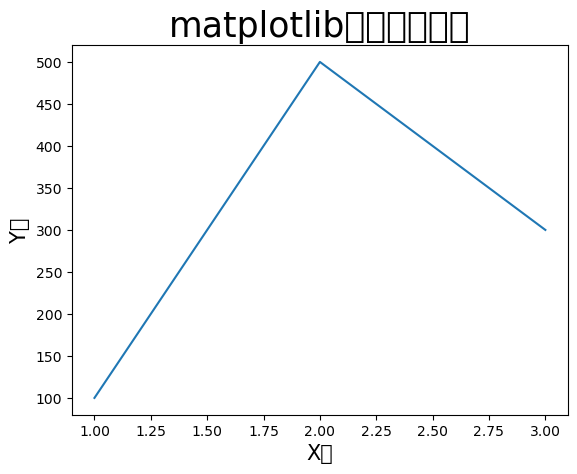

In [59]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [60]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [61]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'step'],
      dtype='object')

In [62]:
metrics = ['loss', 'loss_kpt']#, 'loss_rpn_cls', 'loss_rpn_bbox']

#metrics = ['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch','step']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

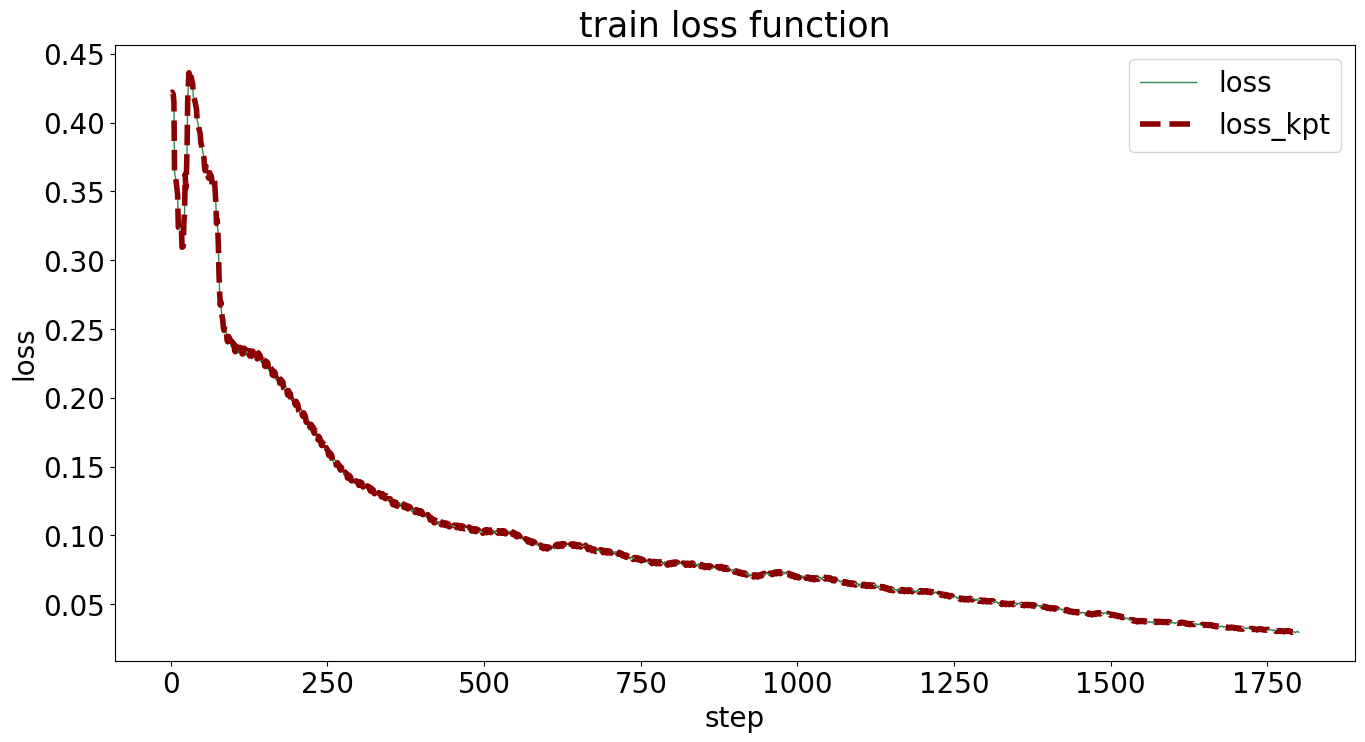

In [63]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train loss function', fontsize=25)
plt.savefig('train loss function.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [64]:
metrics = ['acc_pose']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2430867/2287259432.py:11: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/2287259432.py:11: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/2287259432.py:11: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/22872

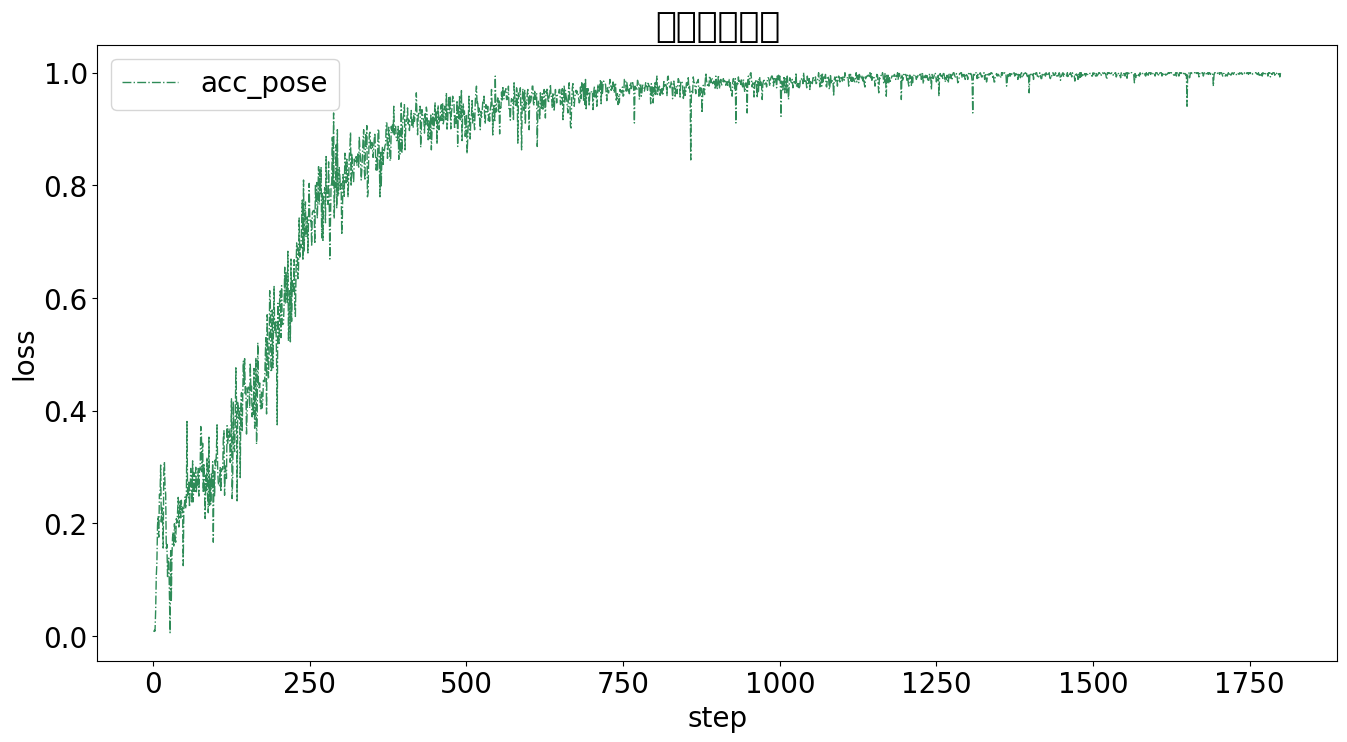

In [65]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [66]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [69]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME']#,'data_time',       'time', 'step']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED I

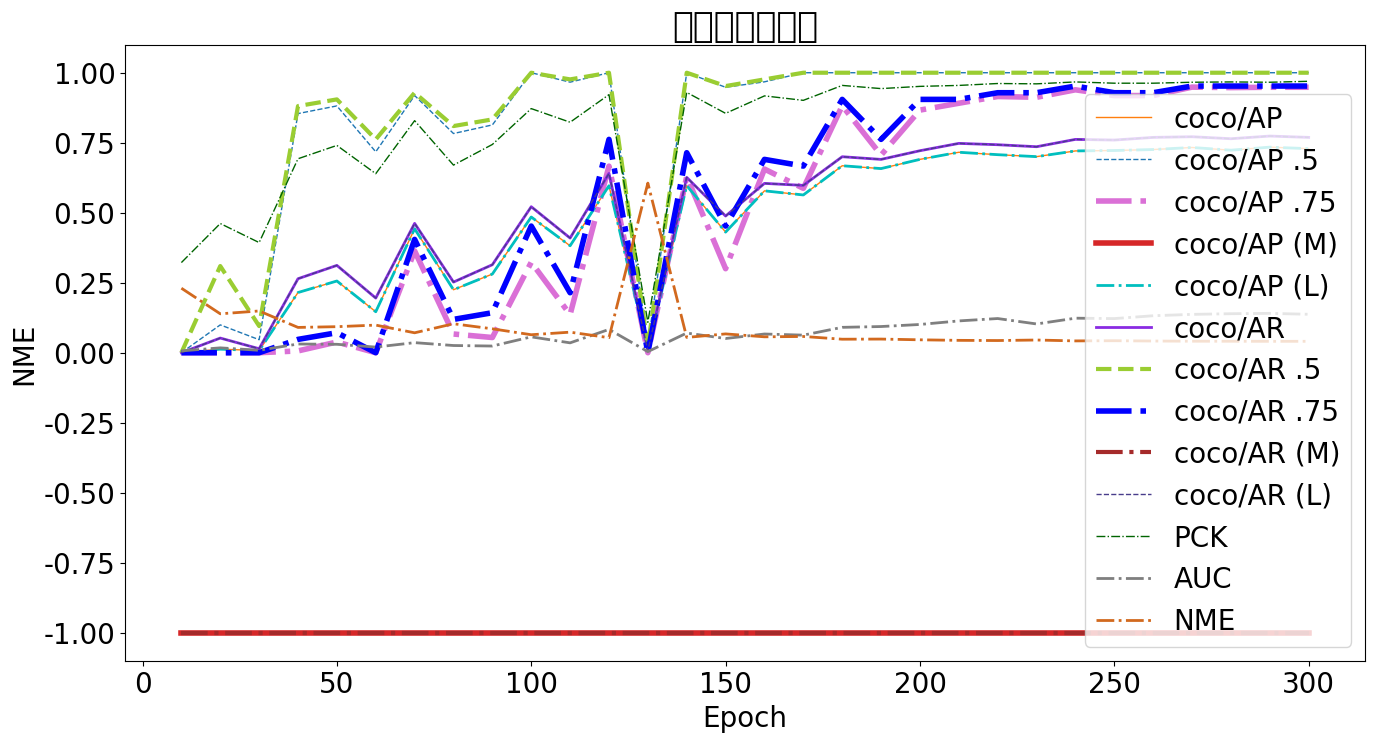

In [70]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric

In [71]:
metrics = ['NME']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867

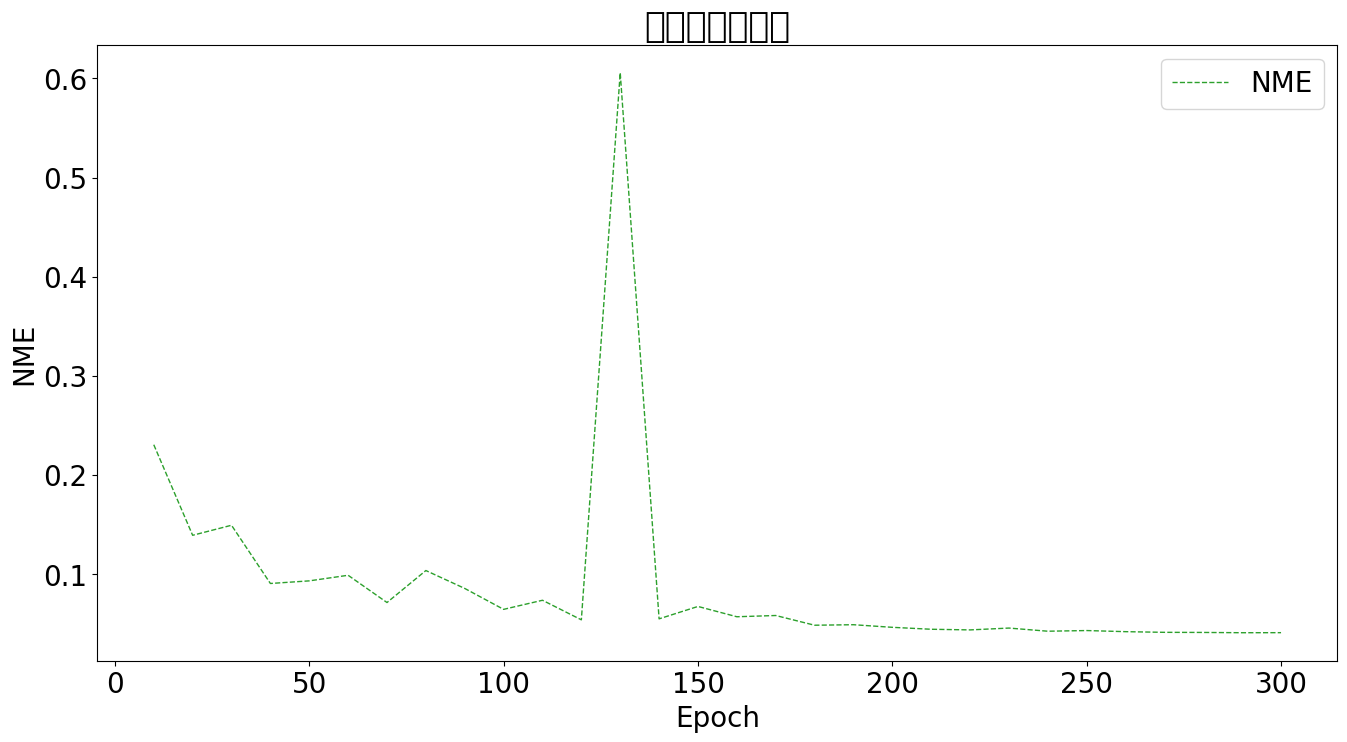

In [72]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [73]:
metrics = ['AUC']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.

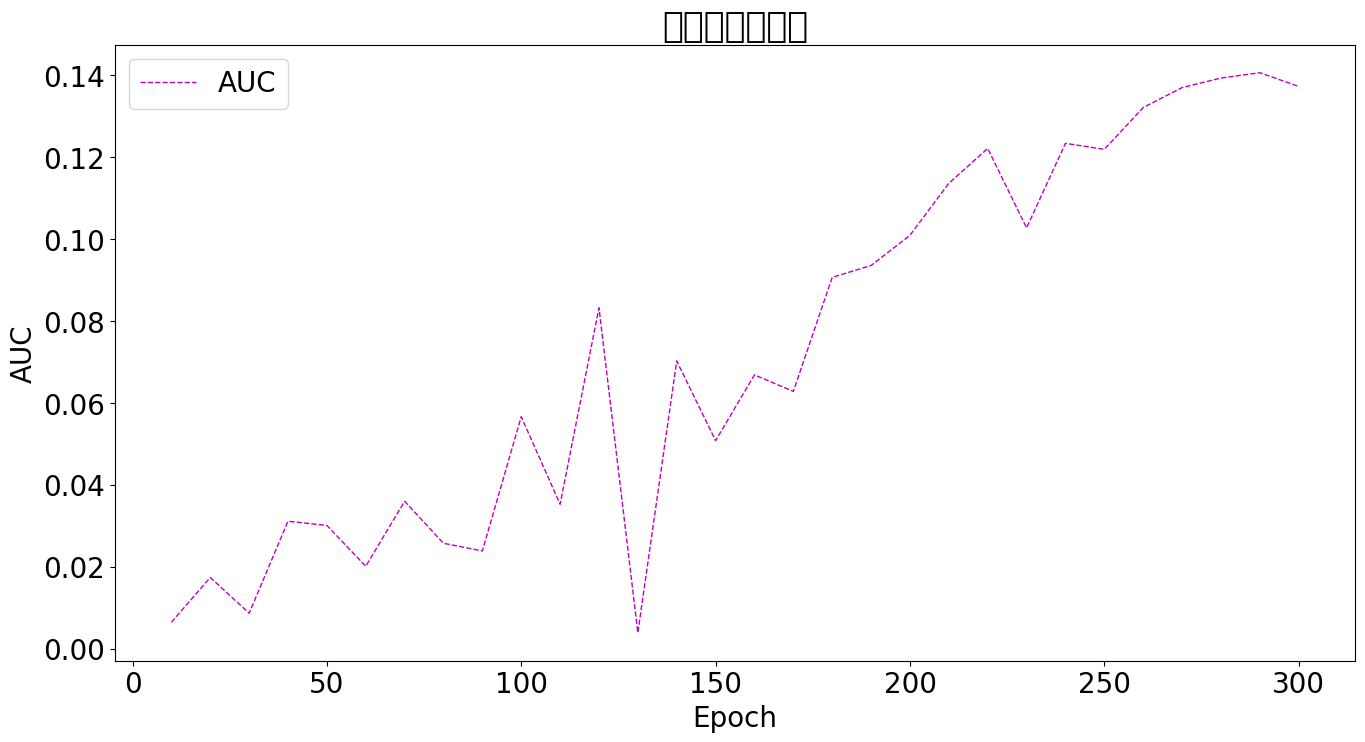

In [74]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [75]:
metrics = ['PCK']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2430867/342112084.py:12: UserWarning: Glyph 35780

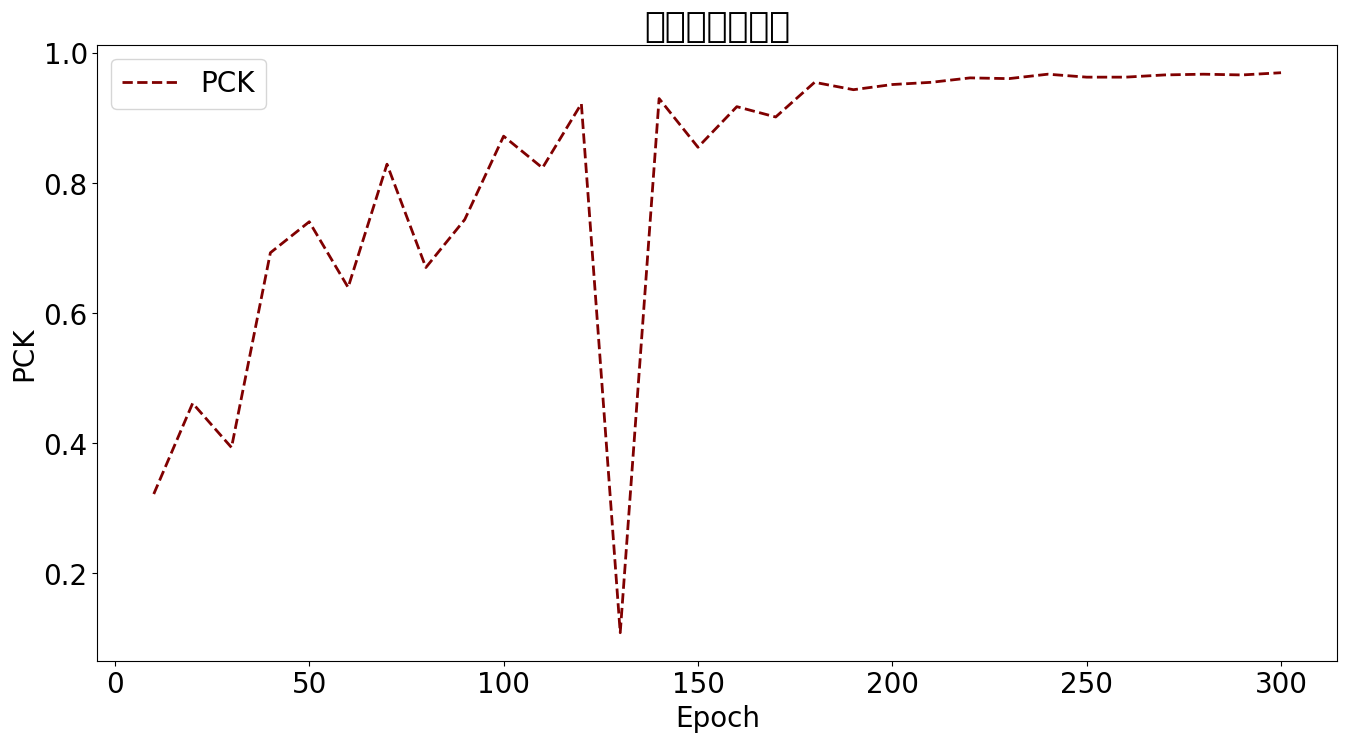

In [76]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()